In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
%matplotlib inline

In [2]:
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
# 데이터 시각화 추세 패키지
import seaborn as sns
# 한글 패치
matplotlib.rc('font', family='Malgun Gothic')

In [3]:
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true - y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [5]:
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
#예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
# 예측 / 회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# os 환경
import os

In [6]:
df_raw_ = pd.read_csv('C:/Users/ParkChihyun/Desktop/3주차 교육자료/Big Data 분석/AIR_POLLUTION.csv',encoding='euc-kr')
df_raw_.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


### 데이터 분석

In [7]:
# 데이터프레임의 데이터 속성 확인
df_raw_.info()

# 총 data수 366개
# 목표변수 결측치 1개
# 오존, 이산화질소 이산화황 결측치 1개씩
# 일산화탄소 결측치 55개 발견
# 결측치 한개씩 있는 변수들은 data의 경향성에 영향 안주므로 제거
# 일산화탄소는 결측치 많으니깐 목표변수와의 상관관계 따진후 평균으로 대체

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   366 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         311 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       366 non-null    float64
 7   RAIN       366 non-null    float64
 8   WIND       366 non-null    float64
 9   WIND_DIR   366 non-null    int64  
 10  HUMIDITY   366 non-null    float64
 11  ATM_PRESS  366 non-null    float64
 12  SNOW       366 non-null    float64
 13  CLOUD      366 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 40.2+ KB


In [8]:
df_raw_.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [9]:
# 기술통계량
df_raw_.describe() 

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


<AxesSubplot:>

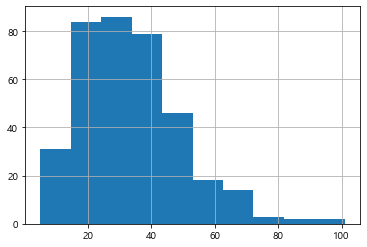

In [10]:
# 목표변수인 미세먼지 농도 분포 확인
df_raw_["PM10"].hist()

# 20~40 사이에 농도가 집중되어 있음

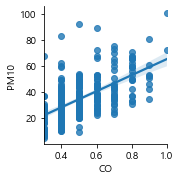

In [11]:
# 결측치 처리 위해 목표변수와 CO간의 관계 그래프
sns.pairplot(df_raw_, y_vars="PM10",x_vars=["CO"],diag_kind = None, kind='reg')

<AxesSubplot:>

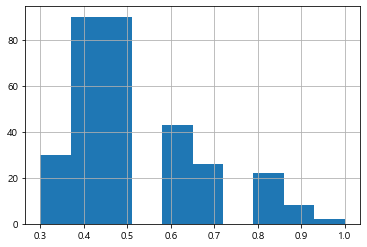

In [12]:
# CO 분포확인
df_raw_["CO"].hist()

# 각각의 그래프를 종합하면 CO와 미세먼지는 상관관계를 가진다.
# 이를 통해 CO의 분포 또한 특정구간에 몰려있을것이라 추측이 가능하다
# 0.5와 0.6사이에 막대가 없기 때문에 이곳에 위치하는 평균값으로대체한다. 

In [13]:
# CO 결측치 대체
df_raw_["CO"].fillna(0.517, inplace = True)

In [14]:
df_raw_.info()
# co 결측치 채워졌고 나머지 결측치 갖는 열 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   366 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         366 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       366 non-null    float64
 7   RAIN       366 non-null    float64
 8   WIND       366 non-null    float64
 9   WIND_DIR   366 non-null    int64  
 10  HUMIDITY   366 non-null    float64
 11  ATM_PRESS  366 non-null    float64
 12  SNOW       366 non-null    float64
 13  CLOUD      366 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 40.2+ KB


In [15]:
df_raw=df_raw_.dropna(inplace=False)
df_raw.isnull().sum()
df_raw.info()
# 결측치 처리완료

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   365 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         365 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       365 non-null    float64
 7   RAIN       365 non-null    float64
 8   WIND       365 non-null    float64
 9   WIND_DIR   365 non-null    int64  
 10  HUMIDITY   365 non-null    float64
 11  ATM_PRESS  365 non-null    float64
 12  SNOW       365 non-null    float64
 13  CLOUD      365 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 42.8+ KB


## 이상치 확인

<AxesSubplot:>

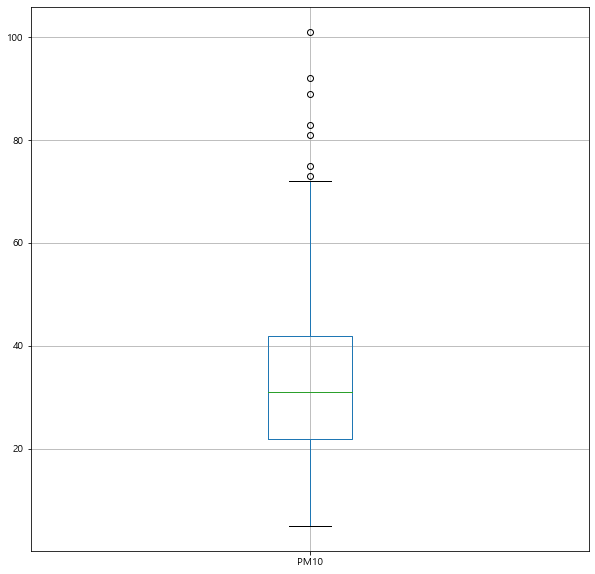

In [16]:
# 상자수염도표로 이상치 확인
df_raw.boxplot(column ="PM10", figsize=(10,10))


In [17]:
df_raw[(df_raw["PM10"] >=100)]

# 목표변수중 100을 넘는 값이하나 있지만 실제로 농도가 100을 넘는 사례가 있기 때문에 정상값으로 판정.

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
162,2019-12-10,101.0,0.01,0.055,1.0,0.004,8.12,0.85,1.22,148,80.6,1008.7,0.0,8.83


<AxesSubplot:>

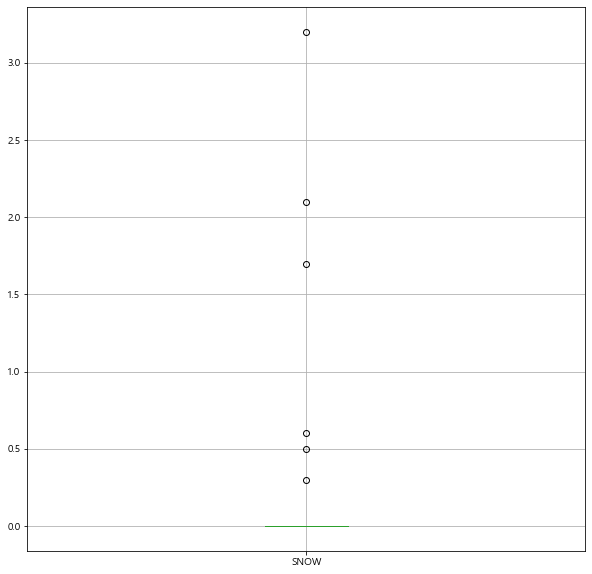

In [18]:
df_raw.boxplot(column ="SNOW", figsize=(10,10))

In [19]:
df_raw[(df_raw["SNOW"] >=3)]

# 눈이나 비 변수가 사분위수를 크게 벗어난값들이 존재하여 이상치를 의심했지만
# 국내 실제사례에 자주 발생하는 수치이므로 정상값으로 판단

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
231,2020-02-17,38.0,0.027,0.011,0.4,0.002,-5.64,0.17,3.43,303,66.5,1006.7,3.2,7.58


In [ ]:
# 각각의 연속형 설명변수들을 5집단으로 나누고 t검정을 통해 유의성을 판단한다.
# data의 수는 365개 이므로 1~


In [103]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    365 non-null    float64
 1   O3      365 non-null    float64
 2   NO2     365 non-null    float64
 3   CO      365 non-null    float64
 4   WIND    365 non-null    float64
dtypes: float64(5)
memory usage: 27.1 KB


### 탐색적분석

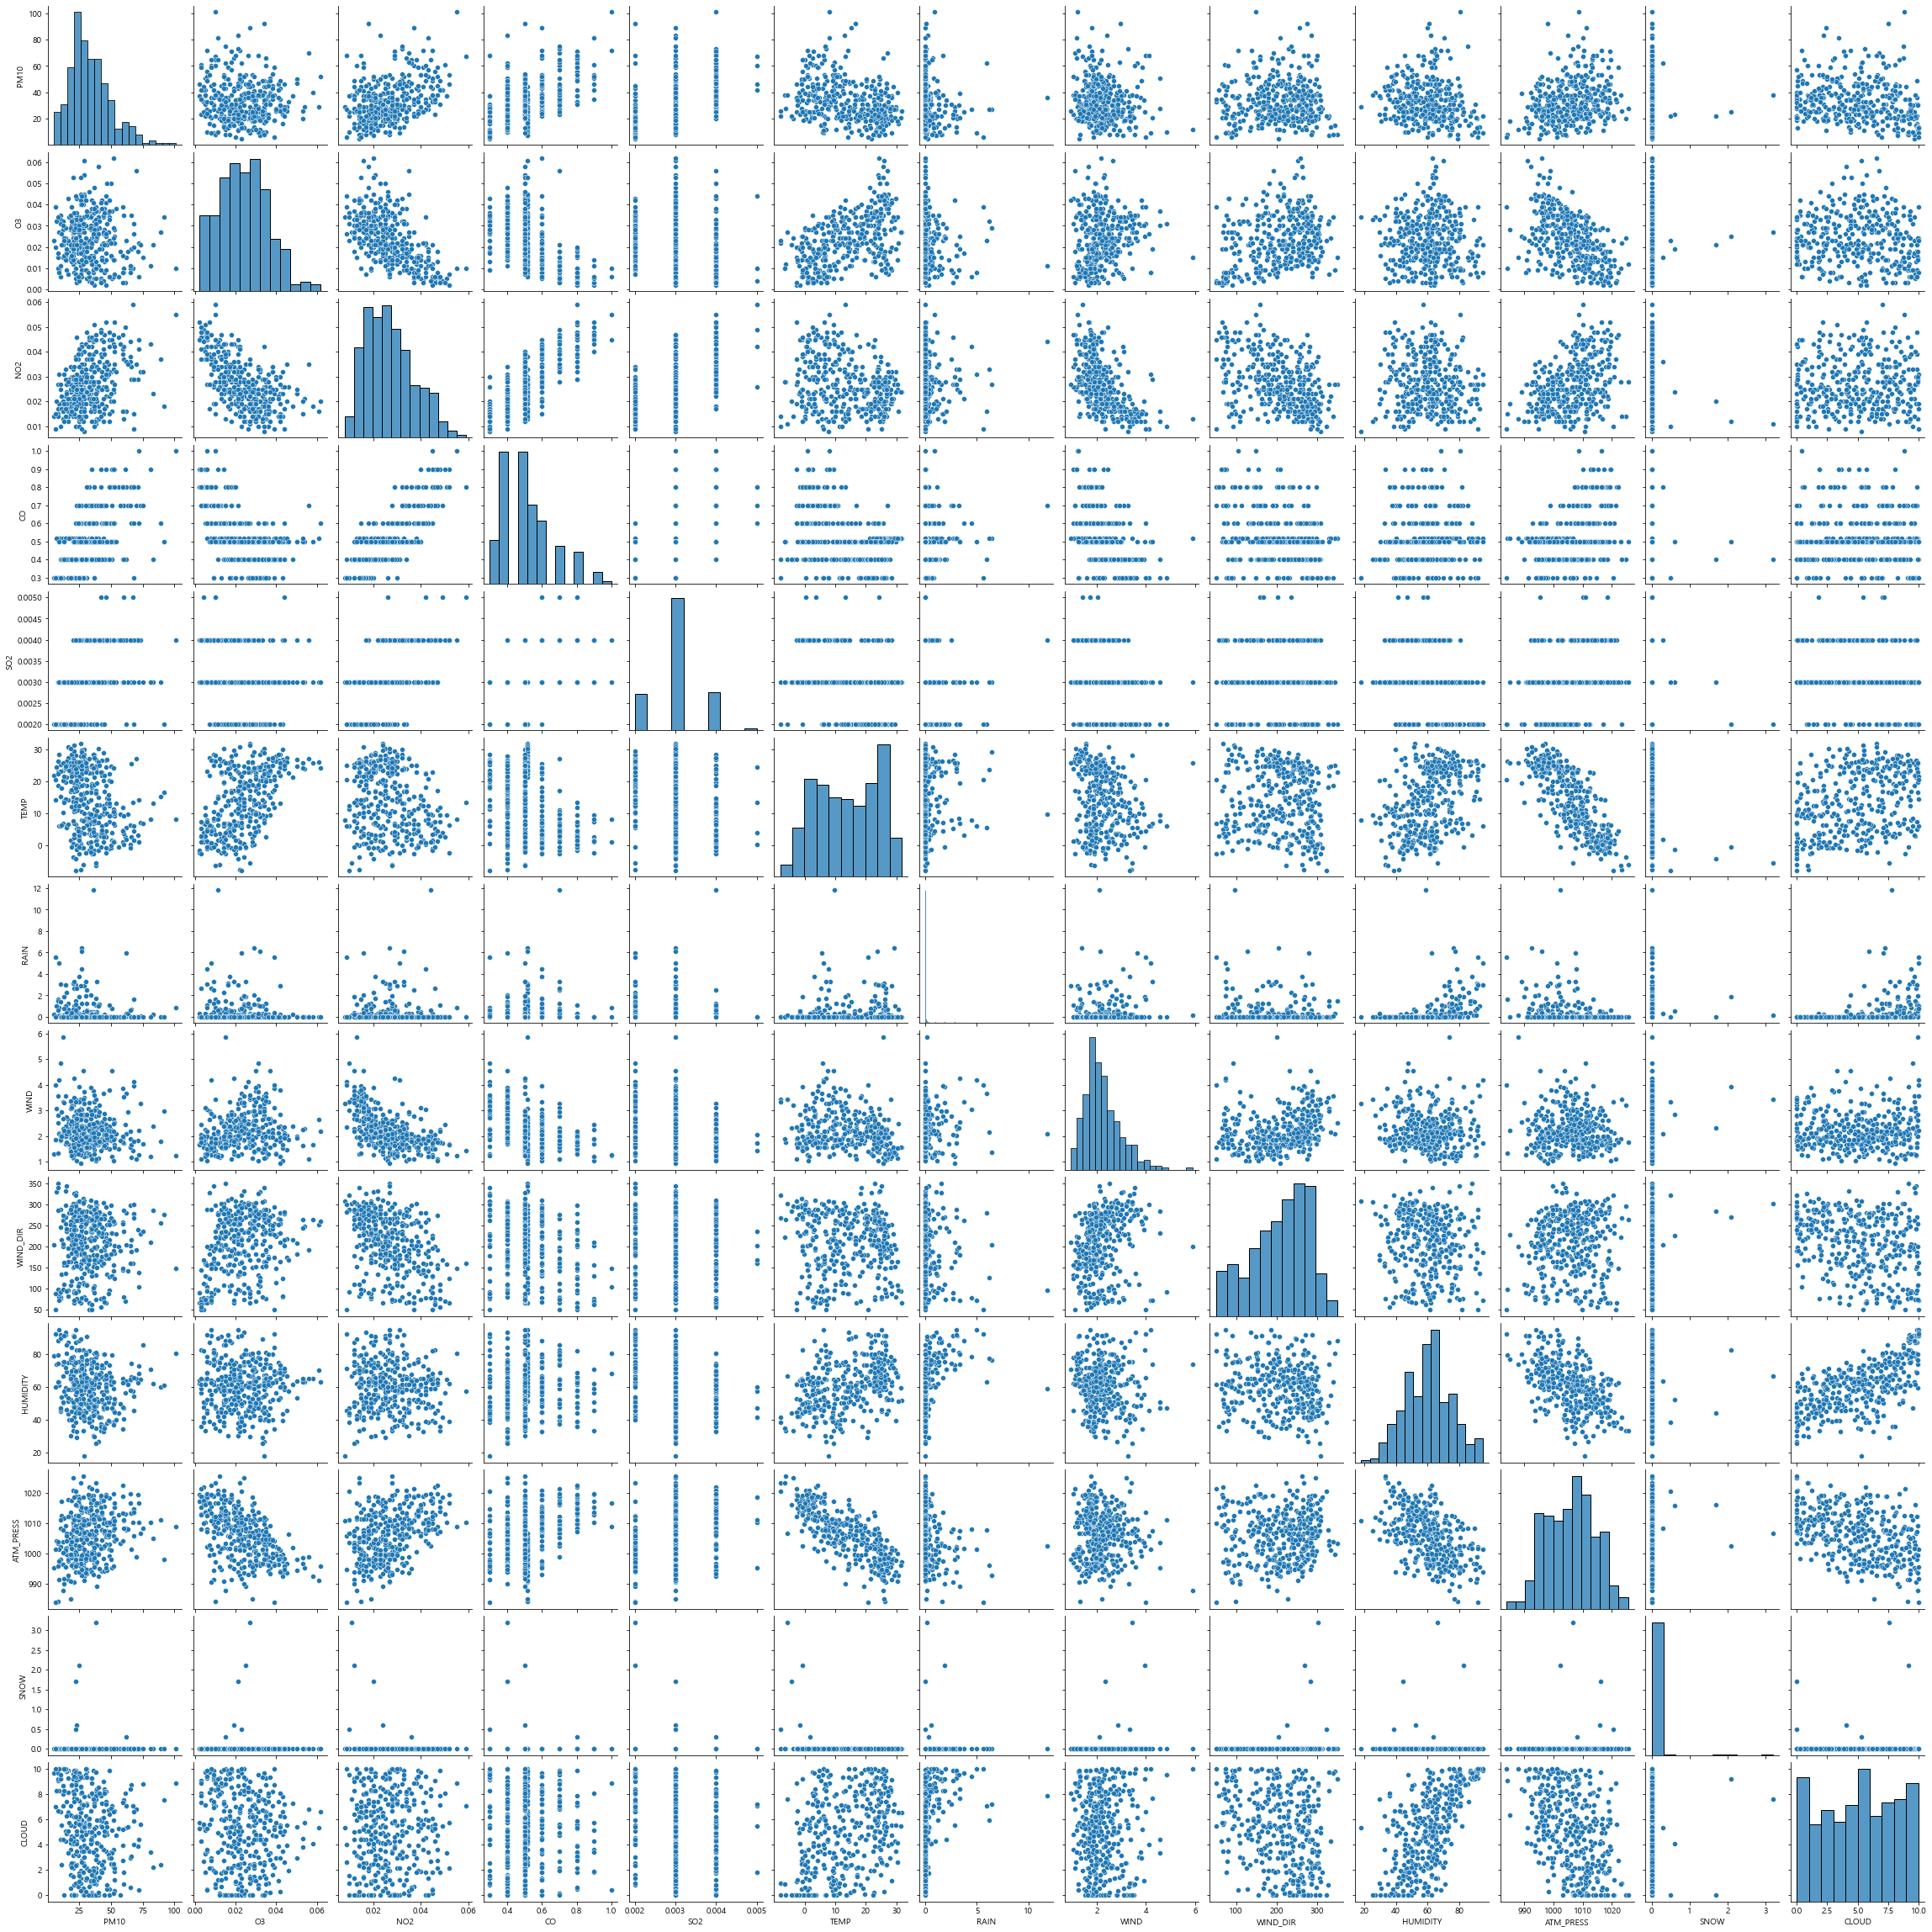

In [20]:
# 목표와 설명변수간의 관계성 찾는다
sns.pairplot(df_raw)

# 해석
# 그래프상에서 상관관계를 찾을 수 있는 설명변수는 이산화질소,일산화탄소, 아황산가스, 강수량, 풍속 이다.

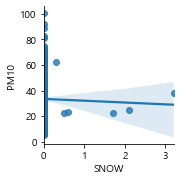

In [104]:
sns.pairplot(df_raw_, y_vars="PM10",x_vars=["SNOW"],diag_kind = None, kind='reg')

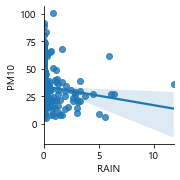

In [105]:
sns.pairplot(df_raw_, y_vars="PM10",x_vars=["RAIN"],diag_kind = None, kind='reg')

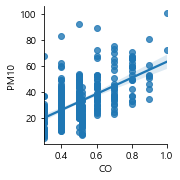

In [106]:
sns.pairplot(df_raw_, y_vars="PM10",x_vars=["CO"],diag_kind = None, kind='reg')

In [21]:
# 산점도를 통해 시각적확인 했다면, 상관분석으로 그 영향력의 크기를수치로 확인
df_raw.corr(method='pearson').round(3)

# 그래프에서 확인한것처럼, NO2, CO, SO2 는 양의상관관계를 가지는데 CO의 영향이 크다. 하지만, 이는 결측치를 대체하는 부분에서
# 생기는 편향성이 원인일 수 있다. 기상학적 요인으로는 온도는 음의 상관관계, 대기압은 양의 상관관계를 갖는 것 확인하였다.
# 모든 설명변수 대체적으로 낮은 편이기 때문에 상관계수가 0.25만 넘어도 관계가 있다고 보았다.

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
PM10,1.000,-0.052,0.396,0.548,0.429,-0.310,-0.121,-0.100,0.020,-0.150,0.253,-0.020,-0.172
O3,-0.052,1.000,-0.592,-0.509,-0.234,0.516,-0.104,0.165,0.269,-0.038,-0.534,0.004,-0.119
NO2,0.396,-0.592,1.000,0.786,0.563,-0.237,0.029,-0.537,-0.408,-0.066,0.420,-0.121,0.017
CO,0.548,-0.509,0.786,1.000,0.559,-0.340,0.037,-0.412,-0.320,0.057,0.385,-0.056,0.037
SO2,0.429,-0.234,0.563,0.559,1.000,-0.274,-0.129,-0.253,-0.093,-0.302,0.334,-0.103,-0.191
TEMP,-0.310,0.516,-0.237,-0.340,-0.274,1.000,0.077,-0.216,-0.050,0.404,-0.792,-0.185,0.342
RAIN,-0.121,-0.104,0.029,0.037,-0.129,0.077,1.000,0.126,-0.183,0.397,-0.236,0.019,0.358
WIND,-0.100,0.165,-0.537,-0.412,-0.253,-0.216,0.126,1.000,0.235,-0.084,-0.054,0.146,0.017
WIND_DIR,0.020,0.269,-0.408,-0.320,-0.093,-0.050,-0.183,0.235,1.000,-0.099,0.068,0.108,-0.297
HUMIDITY,-0.150,-0.038,-0.066,0.057,-0.302,0.404,0.397,-0.084,-0.099,1.000,-0.510,0.022,0.628


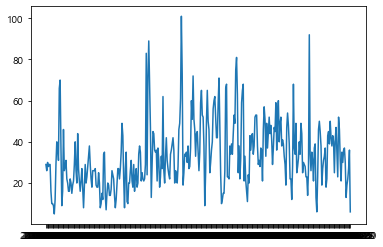

In [22]:
# 시계열차트로 날짜별 미세먼지 농도 조사
plt.plot(df_raw["MeasDate"], df_raw["PM10"])

# MeasDate은 2019-07-01, 2020-06-30 까지의 기간이므로 
# 7,8,9    10,11,12    1,2,3   4,5,6
# 그래프를 통해 여름, 가을에는 농도가 낮다가 겨울, 봄에 농도가 높아지고 다시 여름에 낮아지는것을 확인할 수 있다.

In [23]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [24]:
## ANOVA 분산분석 실시하여 집단 간 분산을 비교한다.
#NO2	CO	SO2	TEMP	RAIN	WIND	WIND_DIR	HUMIDITY	ATM_PRESS	SNOW	CLOUD
lm = ols('PM10 ~ O3+NO2+CO+SO2+TEMP+RAIN+WIND+WIND_DIR+HUMIDITY+ATM_PRESS+SNOW+CLOUD', df_raw).fit()
print(anova_lm(lm))

# 해석
# pvalue가 작을수록 두 집단간 변동의 비가 유의하므로 

              df        sum_sq       mean_sq           F        PR(>F)
O3           1.0    247.750832    247.750832    1.883476  1.708135e-01
NO2          1.0  18988.705429  18988.705429  144.357801  4.219009e-28
CO           1.0  15113.672190  15113.672190  114.898643  2.175016e-23
SO2          1.0   1393.673761   1393.673761   10.595124  1.243871e-03
TEMP         1.0   6516.779762   6516.779762   49.542503  1.021359e-11
RAIN         1.0    341.051201    341.051201    2.592773  1.082486e-01
WIND         1.0    984.932873    984.932873    7.487753  6.527006e-03
WIND_DIR     1.0   1308.041736   1308.041736    9.944123  1.752380e-03
HUMIDITY     1.0     45.077021     45.077021    0.342689  5.586563e-01
ATM_PRESS    1.0   1039.890147   1039.890147    7.905555  5.204394e-03
SNOW         1.0    180.361686    180.361686    1.371163  2.424042e-01
CLOUD        1.0      1.299907      1.299907    0.009882  9.208696e-01
Residual   352.0  46301.788111    131.539171         NaN           NaN


In [25]:
#다중회귀분석 실시하여 importane 나열
# 선형 회귀 분석
reg_model = smf.ols(formula = "PM10 ~ O3+NO2+CO+SO2+TEMP+RAIN+WIND+WIND_DIR+HUMIDITY+ATM_PRESS+SNOW+CLOUD",data=df_raw)
# 적합
reg_result  =reg_model.fit()
print(reg_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     29.24
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           6.66e-46
Time:                        04:09:52   Log-Likelihood:                -1401.8
No. Observations:                 365   AIC:                             2830.
Df Residuals:                     352   BIC:                             2880.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    433.6458    162.647      2.666      0.0

In [26]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   365 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         365 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       365 non-null    float64
 7   RAIN       365 non-null    float64
 8   WIND       365 non-null    float64
 9   WIND_DIR   365 non-null    int64  
 10  HUMIDITY   365 non-null    float64
 11  ATM_PRESS  365 non-null    float64
 12  SNOW       365 non-null    float64
 13  CLOUD      365 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 42.8+ KB


In [27]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop(["PM10","MeasDate"], axis=1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
# DataFrame 으로 저장
df_vif = pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

# 다중공선성의 기준인 10을 넘지 않으므로 제거할 변수는 없다.

,variable,VIF
11,SNOW,1.112
6,RAIN,1.345
8,WIND_DIR,1.503
4,SO2,1.942
7,WIND,1.945
12,CLOUD,2.086
9,HUMIDITY,2.651
1,O3,2.691
3,CO,3.579
5,TEMP,4.497


In [28]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   365 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         365 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       365 non-null    float64
 7   RAIN       365 non-null    float64
 8   WIND       365 non-null    float64
 9   WIND_DIR   365 non-null    int64  
 10  HUMIDITY   365 non-null    float64
 11  ATM_PRESS  365 non-null    float64
 12  SNOW       365 non-null    float64
 13  CLOUD      365 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 42.8+ KB


In [29]:
df_raw.drop("MeasDate",axis=1, inplace=True)
# MeasDate 변수 제거한다.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       365 non-null    float64
 1   O3         365 non-null    float64
 2   NO2        365 non-null    float64
 3   CO         365 non-null    float64
 4   SO2        365 non-null    float64
 5   TEMP       365 non-null    float64
 6   RAIN       365 non-null    float64
 7   WIND       365 non-null    float64
 8   WIND_DIR   365 non-null    int64  
 9   HUMIDITY   365 non-null    float64
 10  ATM_PRESS  365 non-null    float64
 11  SNOW       365 non-null    float64
 12  CLOUD      365 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 39.9 KB


C:\Users\ParkChihyun\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
# RFE(후진 제거법) 함수 : 입력된 모델을 이용하여 변수 중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_raw_y = df_raw["PM10"]
# sklearn 의 선형회귀 모델
model=LinearRegression()
# 전체 변수 중 6개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select=7).fit(df_raw_x, df_raw_y)
# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))


Selected Variables:Index(['O3', 'NO2', 'CO', 'SO2', 'RAIN', 'WIND', 'SNOW'], dtype='object')
Removed Variables:Index(['TEMP', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'CLOUD'], dtype='object')


In [31]:
# 선형 회귀 분석
reg_model = smf.ols(formula = "PM10 ~ O3+NO2+CO+SO2+RAIN+WIND+SNOW",data=df_raw)
# 적합
reg_result  =reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     39.11
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.25e-40
Time:                        04:09:52   Log-Likelihood:                -1424.1
No. Observations:                 365   AIC:                             2864.
Df Residuals:                     357   BIC:                             2895.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.7802      5.743     -7.101      0.0

In [32]:
# 설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_raw_x.columns
# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
# 목표변수 추가
df_scaled["PM10"] = df_raw["PM10"]
reg_model_scaled = smf.ols(formula = "PM10 ~ O3+NO2+CO+SO2+RAIN+WIND+SNOW",data=df_scaled)
reg_result_scaled  =reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     33.02
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           2.71e-35
Time:                        04:09:52   Log-Likelihood:                -1431.7
No. Observations:                 364   AIC:                             2879.
Df Residuals:                     356   BIC:                             2911.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.5329      0.655     51.190      0.0

<AxesSubplot:>

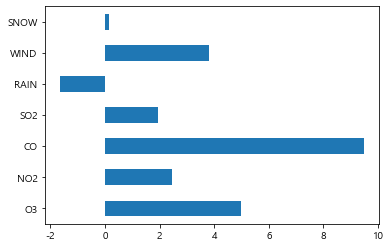

In [33]:
# 설명변수 중요도(표준화 적용 이전) -> 표준화 회귀계수 산출해야 함.
df_reg_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]},index = selected_cols)
df_reg_coef.plot.barh( y="Coef", legend = False)

# 표준화 회귀계수 통한 변수 중요도 확인
#co o3 wind no2 so2 rain 순서

In [34]:
# decision tree 를 통한 변수 중요도 확인
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis = 1, inplace = False)


In [35]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_raw_x, df_raw_y)

DecisionTreeRegressor(random_state=1234)

In [36]:
# 변수명 저장
v_feature_name = df_raw_x.columns

In [37]:
# 결론 도출
# feature_importances_: 설명변수의 중요도
# tree.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_uncustomized.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.378
0,O3,0.181
4,TEMP,0.086
8,HUMIDITY,0.081
6,WIND,0.073
11,CLOUD,0.068
5,RAIN,0.058
9,ATM_PRESS,0.037
7,WIND_DIR,0.023
1,NO2,0.016


Text(0, 0.5, '변수')

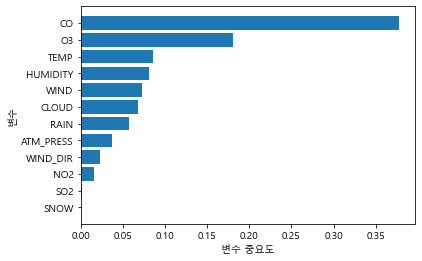

In [38]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


In [39]:
# 랜덤포레스트로 변수 중요도 확인
# 예측 / 회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [40]:
# decision tree 를 통한 변수 중요도 확인
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis = 1, inplace = False)


In [41]:
# 모델 생성 및 predict
tree_final = RandomForestRegressor(random_state=1234)
tree_final.fit(df_raw_x, df_raw_y)


RandomForestRegressor(random_state=1234)

In [42]:
# 변수명 저장
v_feature_name = df_raw_x.columns

In [43]:
# 결론 도출
# feature_importances_: 설명변수의 중요도
# tree.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.373
0,O3,0.124
4,TEMP,0.090
11,CLOUD,0.076
7,WIND_DIR,0.065
6,WIND,0.060
1,NO2,0.057
8,HUMIDITY,0.055
9,ATM_PRESS,0.050
5,RAIN,0.033


Text(0, 0.5, '변수')

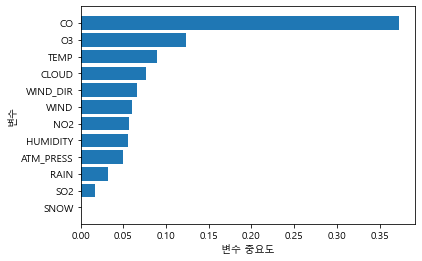

In [44]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [45]:
# decision tree 를 통한 변수 중요도 확인
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis = 1, inplace = False)


In [46]:
# 모델 생성 및 predict
tree_uncustomized = GradientBoostingRegressor(random_state=1234)
tree_uncustomized.fit(df_raw_x, df_raw_y)

GradientBoostingRegressor(random_state=1234)

In [47]:
# 변수명 저장
v_feature_name = df_raw_x.columns

In [48]:
# 결론 도출
# feature_importances_: 설명변수의 중요도
# tree.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_uncustomized.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.396
0,O3,0.157
4,TEMP,0.119
7,WIND_DIR,0.064
11,CLOUD,0.057
1,NO2,0.057
6,WIND,0.045
8,HUMIDITY,0.041
9,ATM_PRESS,0.030
5,RAIN,0.025


Text(0, 0.5, '변수')

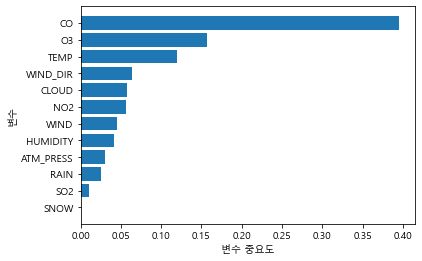

In [49]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [50]:
# 상위 4개의 중요변수만 추려서 모델링을 실시한다.
# CO, NO2, O3, WIND
df_raw = df_raw.drop(["TEMP",'WIND_DIR','CLOUD','SO2','RAIN','ATM_PRESS','SNOW','HUMIDITY'],axis=1)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    365 non-null    float64
 1   O3      365 non-null    float64
 2   NO2     365 non-null    float64
 3   CO      365 non-null    float64
 4   WIND    365 non-null    float64
dtypes: float64(5)
memory usage: 27.1 KB


In [51]:
# 간추린 데이터 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    365 non-null    float64
 1   O3      365 non-null    float64
 2   NO2     365 non-null    float64
 3   CO      365 non-null    float64
 4   WIND    365 non-null    float64
dtypes: float64(5)
memory usage: 27.1 KB


## 회귀모델

In [52]:
# 회귀모델의 성능확인
# 이미 최적의 회귀모델 만들었기 때문에 바로 data분리 후 테스트한다.
# test size 는 0.4 로 !
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                            , test_size = 0.4, random_state =1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (219, 4)
train data Y size : (219,)
test data X size : (146, 4)
test data Y size : (146,)


In [53]:
# 회귀 모델의 예측 모델 생성
lr_model = smf.ols(formula = "PM10~CO+NO2+O3+WIND", data=df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     61.81
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.01e-39
Time:                        04:09:55   Log-Likelihood:                -1432.6
No. Observations:                 365   AIC:                             2875.
Df Residuals:                     360   BIC:                             2895.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.6473      5.698     -6.607      0.0

In [54]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# 의사결정나무 모델링

In [56]:
# 모델 생성 및 predict
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeRegressor(random_state=1234)

In [57]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Score on training set: 0.999
Score on test set: -0.409


In [58]:
# 모델 Parameter 조정
# min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능 
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

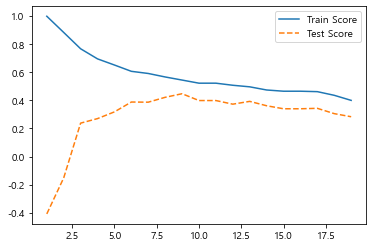

In [59]:
# 모델 설명력 확인
df_score_leaf.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# leaf 자료수는 9로 설정한다.

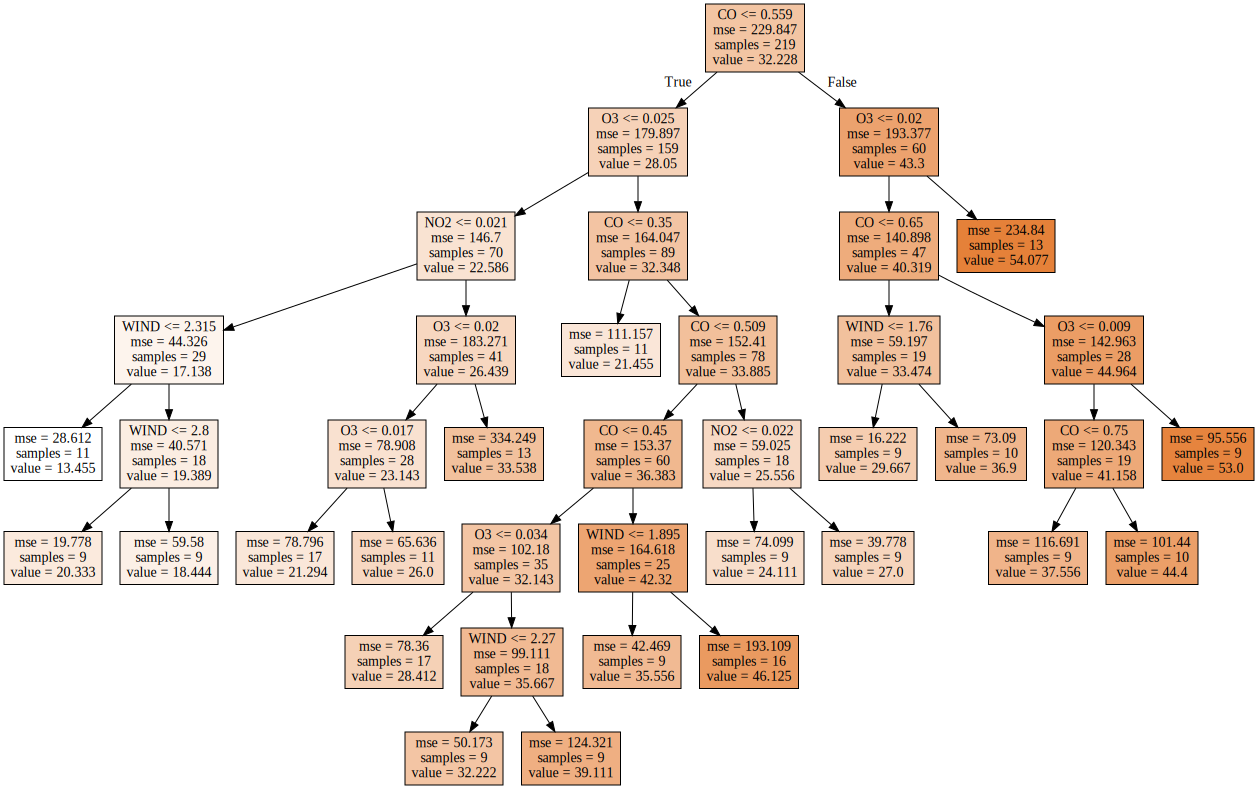

In [60]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수=5 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 9)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",
               feature_names=v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [61]:
# min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2,20)]    # 참조: para_split : [4,6,8,,,,38]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=9
                                , min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.545,0.448
1,6,0.545,0.448
2,8,0.545,0.448
3,10,0.545,0.448
4,12,0.545,0.448
5,14,0.545,0.448
6,16,0.545,0.448
7,18,0.545,0.448
8,20,0.530,0.430
9,22,0.530,0.430


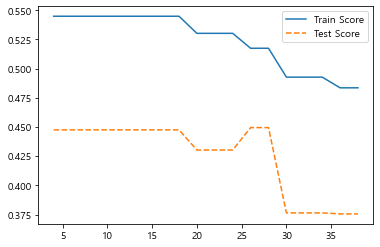

In [62]:
# 모델 설명력 확인
df_score_split.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# split 자료수는 25로 설정한다.

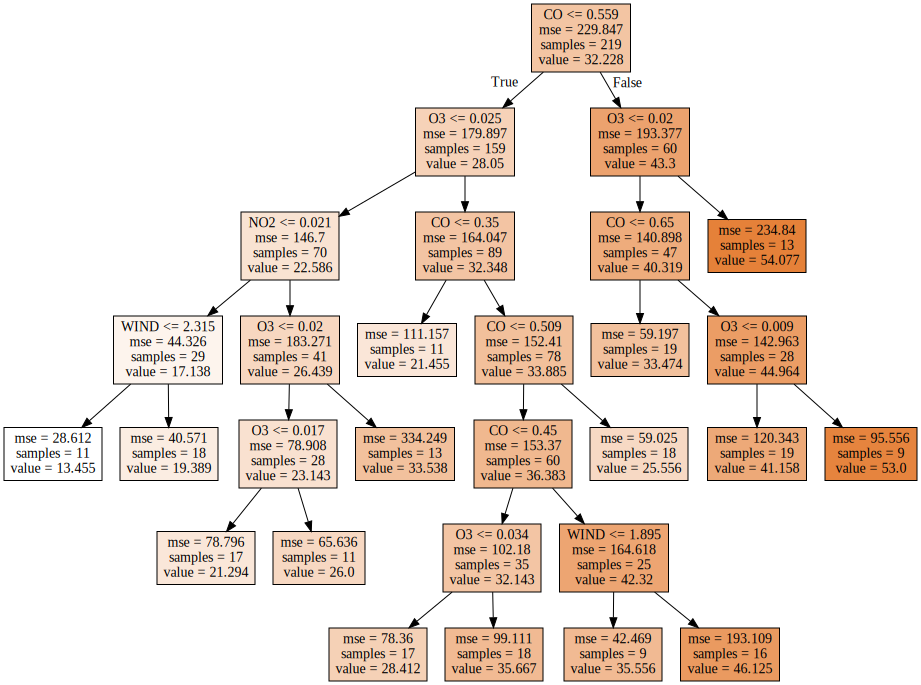

In [63]:
# 분리 노드의 최소 자료 수=12 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=9,
                                min_samples_split=25)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",
               feature_names=v_feature_name, impurity = True, filled = True)
with open("tree_split.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [64]:
# max_depth : 최대 깊이 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]    # 참조: para_depth : [1,2,3,4,,,,10]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=9
                                , min_samples_split = 25,  max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 테이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

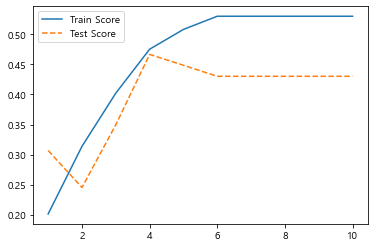

In [65]:
# 모델 설명력 확인
df_score_depth.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# train과 test의 설명력 차이가 적은 4를 depth로 선택한다

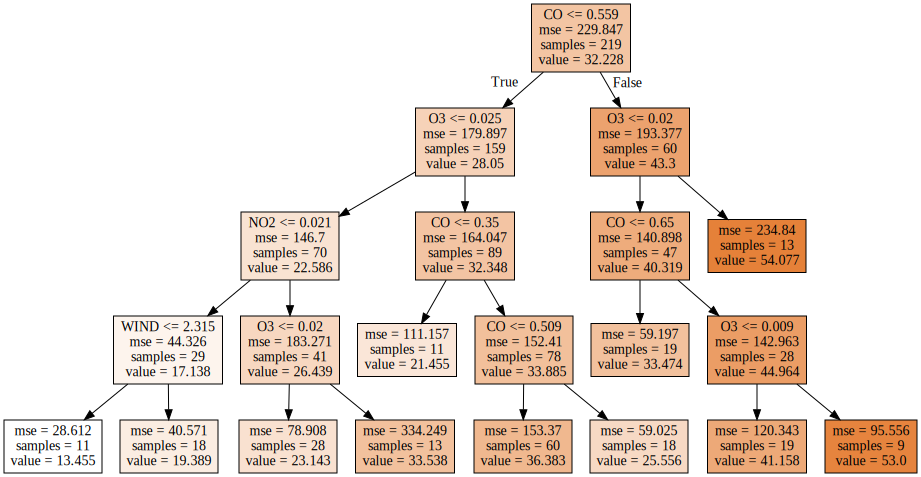

In [66]:
# 최대 깊이 = 4 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=9,
                                min_samples_split=25, max_depth = 4)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file="tree_depth.dot",
               feature_names=v_feature_name, impurity = True, filled = True)
with open("tree_depth.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [67]:
# 최종 모델 선정
# 최종 모델
dt_model = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=9,
                                min_samples_split=25, max_depth = 4)
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=9, min_samples_split=25,
                      random_state=1234)

In [68]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(dt_model.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(dt_model.score(df_test_x, df_test_y)))


Score on training set: 0.475
Score on test set: 0.467


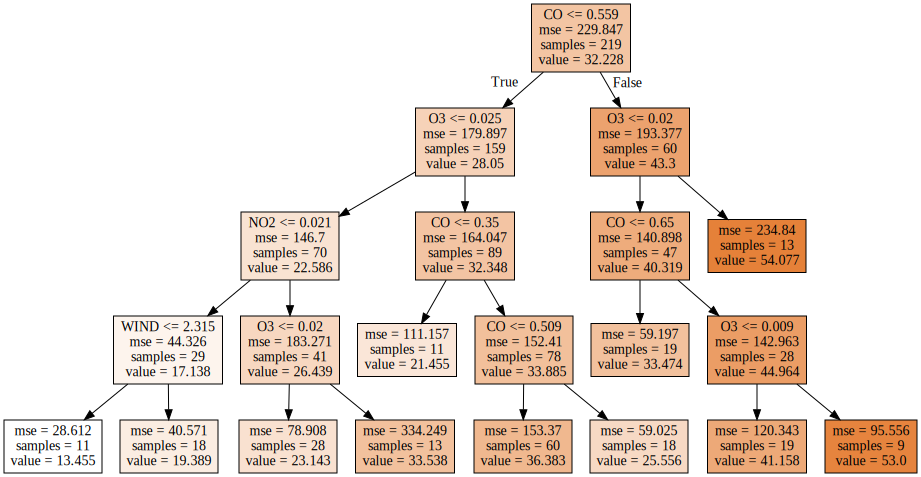

In [71]:
# 최종 모델 시각화


export_graphviz(tree_graph, out_file="dt_final.dot",
               feature_names=v_feature_name, impurity = True, filled = True)
with open("dt_final.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 랜덤포레스트 모델 생성

In [72]:
# 모델 생성 및 predict
tree_uncustomized = RandomForestRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

RandomForestRegressor(random_state=1234)

In [73]:
# 모델 파라미터 조정
# n_estimators : 트리 수 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimators: 트리 수 변경: 1~100
para_n_tree = [n_tree * 8 for n_tree in range(1,20)]    

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234,n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 테이터 테이블로 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

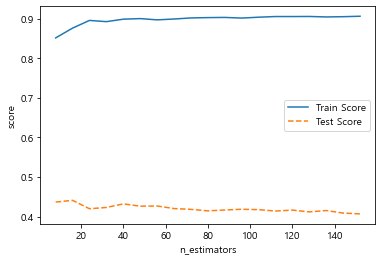

In [74]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

# 설명력이 높고 train과 test의 설명력 차이가 적은 40을 트리의 수로 정한다.

In [75]:
# min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능 
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234
                                , min_samples_leaf=v_min_samples_leaf, n_estimators = 40)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

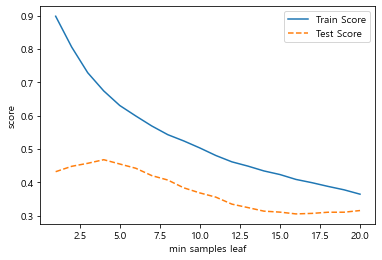

In [76]:
# 모델 설명력 확인
df_score_leaf.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("min samples leaf")
plt.legend()

# train 의 성능이 급격히 떨어지므로 감소를 최대한 막을 수 있도록 leaf의 자료수를 2로 설정한다.

In [77]:
 #min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2,21)]    # 참조: para_split : [4,6,8,,,,38]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234,min_samples_leaf=2, n_estimators = 40
                                , min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

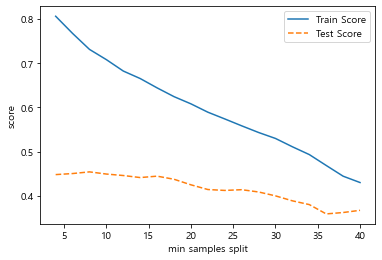

In [78]:
# 모델 설명력 확인
df_score_split.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

# test성능이 최고점일때인 8을 split 자료수로 정한다.

In [79]:
# max_depth : 최대 깊이 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]    # 참조: para_depth : [1,2,3,4,,,,10]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234,min_samples_leaf=2, n_estimators = 40
                                , min_samples_split = 8,  max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 테이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

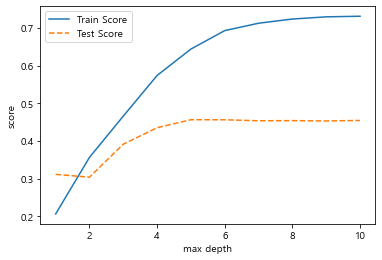

In [80]:
# 모델 설명력 확인
df_score_depth.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

# 과적합을 줄이면서 성능을 높이기 위해서 6을 depth로 설정한다.

In [81]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Score on training set: 0.903
Score on test set: 0.417


In [82]:
# 최종 모델 선정
# 최종 모델
rf_result = RandomForestRegressor(random_state = 1234,n_estimators=40, min_samples_leaf=2,
                                min_samples_split=8, max_depth = 6)
rf_result.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_result.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_result.score(df_test_x, df_test_y)))


Score on training set: 0.693
Score on test set: 0.456


In [83]:
tree_uncustomized

RandomForestRegressor(random_state=1234)

## gradient boosting 모델링
# 모델 생성 및 predict


In [ ]:
tree_uncustomized = GradientBoostingRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

In [85]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Score on training set: 0.856
Score on test set: 0.364


In [86]:
# 모델 파라미터 조정
# n_estimators : 트리 수 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimators: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,20)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 테이터 테이블로 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

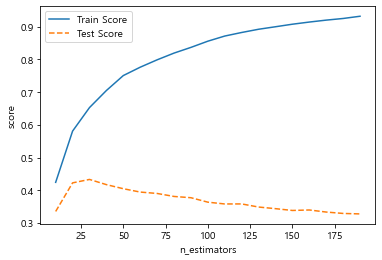

In [87]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

# train과 test의 설명력 차이가 적은 30을 트리의 수로 정한다.

In [88]:
# min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능 
# train 및 test 설명력 결과 저장
train_score = []; test_score=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234
                                , min_samples_leaf=v_min_samples_leaf, n_estimators = 30)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

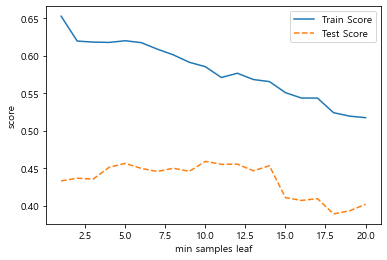

In [89]:
# 모델 설명력 확인
df_score_leaf.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("min samples leaf")
plt.legend()

# 설명력의 차이가 적고 test의 성능이 가장 좋은 10을 leaf 자료수로 정한다.

In [90]:
# min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1,21)]    # 참조: para_split : [4,6,8,,,,38]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234,min_samples_leaf=10, n_estimators = 30
                                , min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

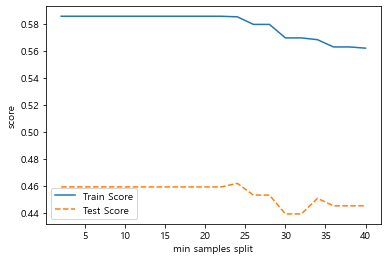

In [91]:
# 모델 설명력 확인
df_score_split.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

# train과 test의 차이가 적고 test의 성능이 가장 높은 24를 split 자료수로 설정한다.

In [92]:
# max_depth : 최대 깊이 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]    # 참조: para_depth : [1,2,3,4,,,,10]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234,min_samples_leaf=10, n_estimators = 30
                                , min_samples_split = 24,  max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 테이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

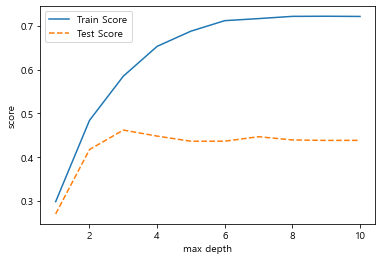

In [93]:
# 모델 설명력 확인
df_score_depth.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

# test의 성능이 가장 높고 과적합을 방지하는 값인 3을 depth 자료수로 설정

In [94]:
# learning_rate : 학습률 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# learning rate : 학습률 변경 0.1~0.9
para_lr = [lr*0.2 for lr in range(1,10)]    

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234,min_samples_leaf=10, n_estimators = 30
                                , min_samples_split = 24,  max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 테이터 테이블로 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

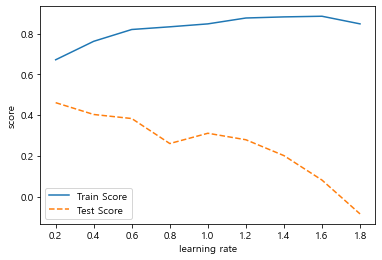

In [95]:
# 모델 설명력 확인
df_score_lr.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

# test 성능이 좋고 train 과의 성능의 차이를 줄이기 위해 0.2를 learning rate으로 설정한다.

In [96]:
# 최종 모델 선정
# 최종 모델
gb_result = GradientBoostingRegressor(random_state=1234,min_samples_leaf=10, n_estimators = 30
                                , min_samples_split = 24,  max_depth = 3, learning_rate =0.2)
gb_result.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_result.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_result.score(df_test_x, df_test_y)))


Score on training set: 0.671
Score on test set: 0.461


In [97]:
# 모델리스트, 그래프를 그리기 생성 목적
models = ["회귀분석","의사결정나무",'랜덤 포레스트','그래디언트 부스팅']
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

In [98]:
# 회귀분석 예측
lr_y_pred = lr_result.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [99]:
# 의사결정나무 예측
dt_y_pred = dt_model.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [100]:
# 랜덤 포레스트 예측
rf_y_pred = rf_result.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [101]:
# 그래디언트 부스팅 예측
gb_y_pred = gb_result.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

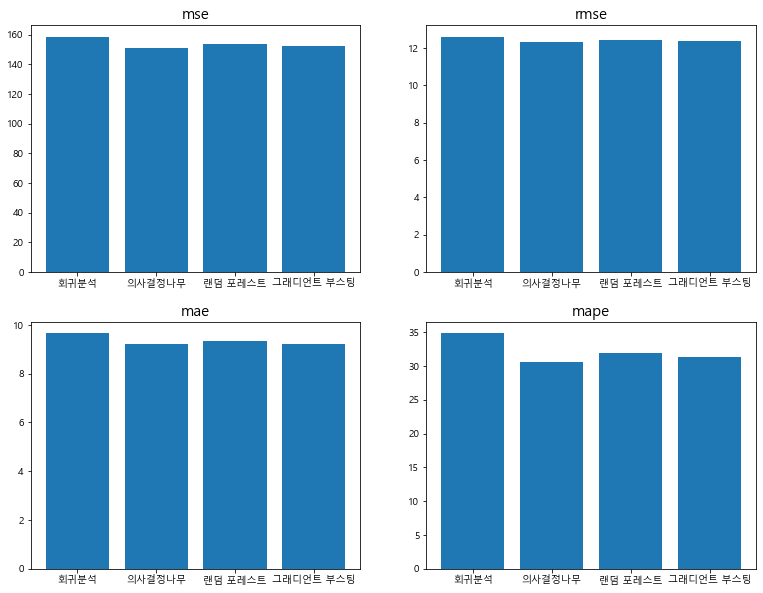

In [102]:
#시각화
fig, ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)
